<a href="https://colab.research.google.com/github/inokchoi/Speech/blob/main/tacotron_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
import IPython.display as ipd
import sys
import numpy as np
import torch
import librosa
import yaml
import pdb
import os
from src.module import Tacotron
from src.symbols import txt2seq
from src.utils import AudioProcessor

In [ ]:
def plot_data(data, figsize=(16, 4)):
    fig, axes = plt.subplots(1, len(data), figsize=figsize)
    for i in range(len(data)):
        axes[i].imshow(data[i], aspect='auto', origin='bottom', 
                       interpolation='none')

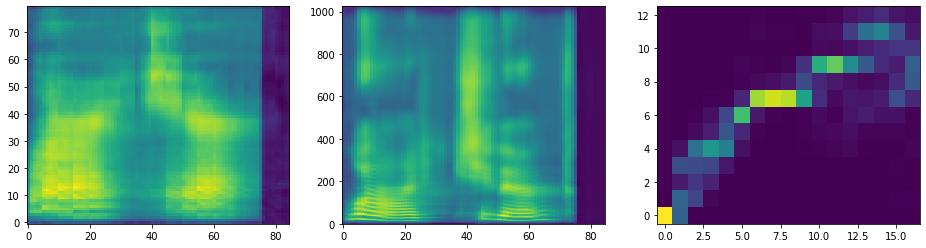

In [ ]:
# Set environmental parameters.
device = torch.device('cpu')
config = yaml.load(open('./config/config.yaml', 'r'), Loader=yaml.FullLoader)
output = './demo/{}.wav'

# Define a model.
model = Tacotron(**config['model']['tacotron']).to(device)

# Load the trained model.
model_path = './ckpt/checkpoint_step138000.pth'
checkpoint = torch.load(model_path, map_location=device)
model.load_state_dict(checkpoint['state_dict'])

######### text that we want to generate ###########
text = 'happy birthday to you'

# Input text embedding.
seq = np.asarray(txt2seq(text))
seq = torch.from_numpy(seq).unsqueeze(0).long()

# Decode the signal.
with torch.no_grad():
    mel, spec, attn = model(seq)
    
# Generate wav file using the Griffin-Lim algorithm.
ap = AudioProcessor(**config['audio'])
wav = ap.inv_spectrogram(spec[0].numpy().T)

# Plot spectogram and attention weights.
plot_data((mel.float().data.cpu().numpy()[0].T,   #mel
           spec.float().data.cpu().numpy()[0].T,  #linear
           attn.float().data.cpu().numpy()[0].T)) #attention module : 데이터가 많지 않음. 진하게 잘 잡히면 성능이 좋은 것이다.

In [ ]:
# play the wav signal
ipd.Audio(wav, rate=config['audio']['sample_rate']) 

In [ ]:
# save wav file
ap.save_wav(wav, output.format(text.replace(' ','_')))

성능을 높이고 싶으면
tracotron2 검색하면 NVIDIA에서 만든것이 있는데, 성능이 좋다.
